In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
% matplotlib inline

### Let's have a look at number of available features

In [2]:
filepath="G:/Sem3/DMT/used-cars-database_new/autos.csv"
usedcars=pd.read_csv(filepath,delimiter=",",low_memory=False,encoding = 'latin_1')
print("List of all features\n")
print(usedcars.columns)

List of all features

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


### Let recode the categorical variable to a numerical:
#### Recoded variables:
##### seller - sellers_coded
##### vehicleType - vehicleType_Cat
##### offerType - offerType_coded
##### abtest - abtest_coded
##### gearbox - gearbox_coded
##### brand - brand_Cat
##### model - model_Cat
##### fuelType - fuelType_Cat
##### notRepairedDamage - RepairedDamage_Cat

In [3]:
# Create a sellers_coded Categorical column and recode it into a numerical one 
usedcars.loc[usedcars['seller'].isnull(),'vehicleType']='Not Specified'
usedcars['sellers_coded']=usedcars['seller'].astype('category')
usedcars['sellers_coded']=usedcars['sellers_coded'].cat.codes


# Create a vehicleType_Cat Categorical column and recode it into a numerical one 
usedcars.loc[usedcars['vehicleType'].isnull(),'vehicleType']='Not Specified'
usedcars['vehicleType_Cat']=usedcars['vehicleType'].astype('category')
usedcars['vehicleType_Cat']=usedcars['vehicleType_Cat'].cat.codes

# Create a offerType_coded Categorical column and recode it into a numerical one 
usedcars.loc[usedcars['offerType'].isnull(),'offerType']='Not Specified'
usedcars['offerType_coded']=usedcars['offerType'].astype('category')
usedcars['offerType_coded']=usedcars['offerType_coded'].cat.codes

# Create a abtest_coded Categorical column and recode it into a numerical one 
usedcars.loc[usedcars['abtest'].isnull(),'abtest']='Not Specified'
usedcars['abtest_coded']=usedcars['abtest'].astype('category')
usedcars['abtest_coded']=usedcars['abtest_coded'].cat.codes

# Create a gearbox_coded Categorical column and recode it into a numerical one 
usedcars.loc[usedcars['gearbox'].isnull(),'gearbox']='Not Specified'
usedcars['gearbox_coded']=usedcars['gearbox'].astype('category')
usedcars['gearbox_coded']=usedcars['gearbox_coded'].cat.codes

# Create a brand Categorical column and recode it into a numerical one 
usedcars.loc[usedcars['brand'].isnull(),'brand']='Not Specified'
usedcars['brand_Cat']=usedcars['brand'].astype('category')
usedcars['brand_Cat']=usedcars['brand_Cat'].cat.codes

# Create a model Categorical column and recode it into a numerical one 
usedcars.loc[usedcars['model'].isnull(),'model']='Not Specified'
usedcars['model_Cat']=usedcars['model'].astype('category')
usedcars['model_Cat']=usedcars['model_Cat'].cat.codes

# Create a fuelType Categorical column and recode it into a numerical one 
usedcars.loc[usedcars['fuelType'].isnull(),'fuelType']='Not Specified'
usedcars['fuelType_Cat']=usedcars['fuelType'].astype('category')
usedcars['fuelType_Cat']=usedcars['fuelType_Cat'].cat.codes

# Create a RepairedDamage_Cat Categorical column and recode it into a numerical one 
usedcars.loc[usedcars['notRepairedDamage'].isnull(),'fuelType']='Not Specified'
usedcars['RepairedDamage_Cat']=usedcars['notRepairedDamage'].astype('category')
usedcars['RepairedDamage_Cat']=usedcars['RepairedDamage_Cat'].cat.codes

usedcars['lastSeen']=usedcars['lastSeen'].astype('datetime64')
usedcars['dateCreated']=usedcars['dateCreated'].astype('datetime64')
usedcars_temp=pd.DataFrame()

In [4]:
usedcars_temp=usedcars

## Feature Engineering
#### Remove rows with price less than 100
#### Price_tr = log(price)
#### No_of_Days_online = lastSeen - dateCreated
#### YearsOld = dateCreated - yearOfRegistration
#### KTY_ratio = kilometer/YearsOld (Kilometer to year ratio)
#### Extract the length of the name as feature

In [5]:
usedcars_temp=usedcars_temp[usedcars_temp['price']>1000]
usedcars_temp['powerPS_tr']=np.log1p(usedcars_temp['powerPS'])
usedcars_temp['price_tr'] = np.log1p(usedcars_temp['price'])
usedcars_temp['No_of_Days_online']=(pd.to_datetime(usedcars_temp['lastSeen'])-pd.to_datetime(usedcars_temp['dateCreated'])).dt.days
usedcars_temp['YearsOld']=(usedcars_temp['dateCreated']).dt.year-usedcars_temp['yearOfRegistration']
usedcars_temp=usedcars_temp[usedcars_temp['YearsOld']>0]
usedcars_temp['KTY_ratio']=usedcars_temp['kilometer']/usedcars_temp['YearsOld']
usedcars_temp=usedcars_temp.replace([np.inf, -np.inf], np.nan).dropna(subset=["KTY_ratio"], how="all")
usedcars_temp['namelen'] = [min(70, len(n)) for n in usedcars_temp['name']]
usedcars_temp['year_tr']=np.log1p(usedcars_temp['yearOfRegistration'])
usedcars_temp['kilometer']=np.log1p(usedcars_temp['kilometer'])

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

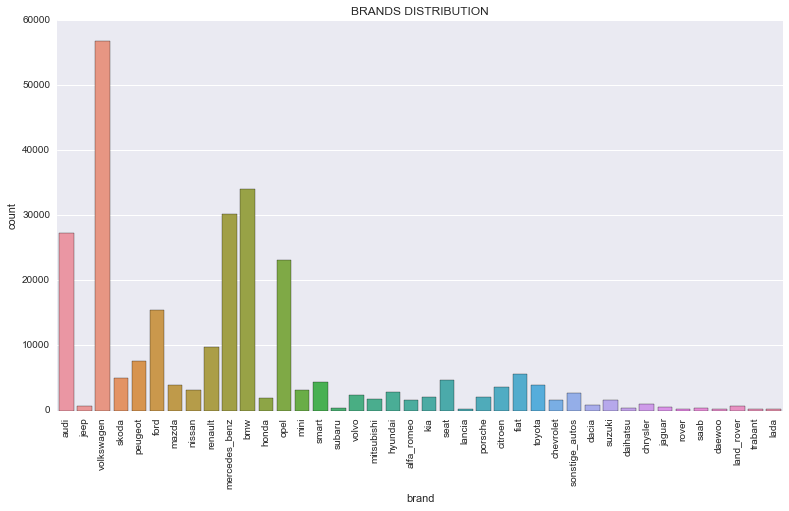

In [6]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
plt.title('BRANDS DISTRIBUTION')
g = sns.countplot(usedcars_temp['brand'])
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=90)

(array([  3.71527000e+05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  0.00000000e+00,   2.14748365e+08,   4.29496729e+08,
          6.44245094e+08,   8.58993459e+08,   1.07374182e+09,
          1.28849019e+09,   1.50323855e+09,   1.71798692e+09,
          1.93273528e+09,   2.14748365e+09]),
 <a list of 10 Patch objects>)

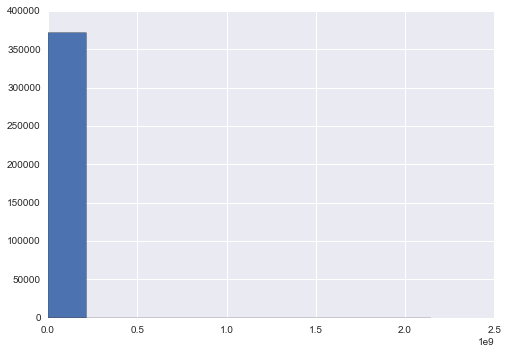

In [7]:
plt.hist(usedcars["price"])

(array([  1.20170000e+04,   9.17000000e+02,   3.73450000e+04,
          1.98687000e+05,   1.20615000e+05,   1.83700000e+03,
          5.60000000e+01,   3.50000000e+01,   1.80000000e+01,
          1.00000000e+00]),
 array([  0.        ,   2.14875626,   4.29751252,   6.44626878,
          8.59502504,  10.7437813 ,  12.89253756,  15.04129382,
         17.19005008,  19.33880634,  21.4875626 ]),
 <a list of 10 Patch objects>)

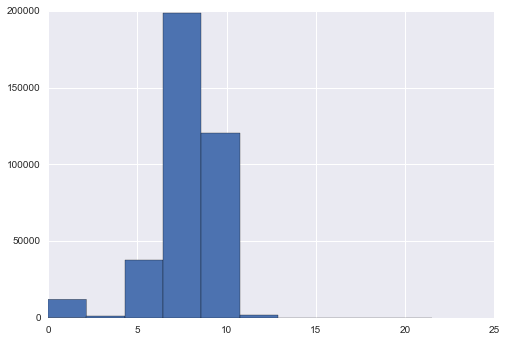

In [8]:
plt.hist(np.log1p(usedcars["price"]))

######  Features selected:
######  X: sellers_coded, vehicleType_Cat, offerType_coded, abtest_coded, gearbox_coded, brand_Cat, model_Cat, fuelType_Cat, RepairedDamage_Cat, No_of_Days_online, YearsOld, KTY_ratio, namelen,powerPS_tr,year_tr, kilometer
###### Y: price_tr

In [9]:
XY=usedcars_temp[['gearbox_coded','brand_Cat','fuelType_Cat','RepairedDamage_Cat','No_of_Days_online','YearsOld','KTY_ratio','namelen','powerPS_tr','monthOfRegistration','year_tr','kilometer','price_tr']]
XY=XY.replace([np.inf, -np.inf], np.nan).dropna(subset=['gearbox_coded','brand_Cat','fuelType_Cat','RepairedDamage_Cat','No_of_Days_online','YearsOld','KTY_ratio','namelen','powerPS_tr','monthOfRegistration','year_tr','kilometer','price_tr'], how="all")

In [10]:
corr=XY.corr()["price_tr"]
corr[np.argsort(corr, axis=0)[::-1]]

price_tr               1.000000
KTY_ratio              0.375552
powerPS_tr             0.276214
year_tr                0.254154
namelen                0.196813
fuelType_Cat           0.195147
RepairedDamage_Cat     0.184043
No_of_Days_online      0.141055
monthOfRegistration    0.042023
brand_Cat             -0.114247
gearbox_coded         -0.199983
YearsOld              -0.305899
kilometer             -0.372112
Name: price_tr, dtype: float64

In [11]:
XY1=usedcars_temp[['fuelType_Cat','RepairedDamage_Cat','YearsOld','KTY_ratio','powerPS_tr','year_tr','kilometer','price_tr']]
XY1=XY1.replace([np.inf, -np.inf], np.nan).dropna(subset=['fuelType_Cat','RepairedDamage_Cat','YearsOld','KTY_ratio','powerPS_tr','year_tr','kilometer','price_tr'], how="all")

In [12]:
corr1=XY1.corr()["price_tr"]
corr1[np.argsort(corr1, axis=0)[::-1]]

price_tr              1.000000
KTY_ratio             0.375552
powerPS_tr            0.276214
year_tr               0.254154
fuelType_Cat          0.195147
RepairedDamage_Cat    0.184043
YearsOld             -0.305899
kilometer            -0.372112
Name: price_tr, dtype: float64

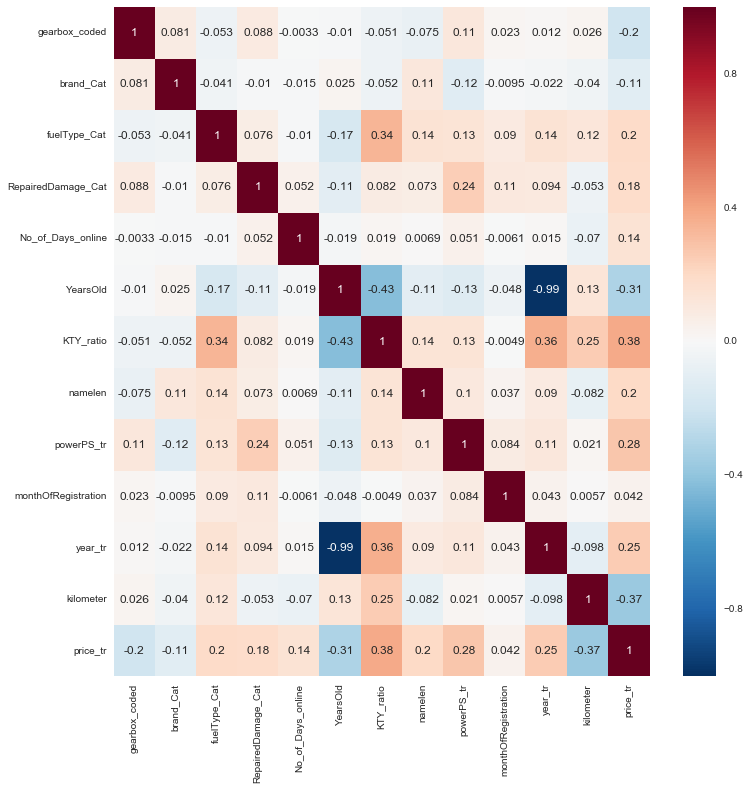

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(XY.corr(), annot=True)

In [14]:
X=XY[['gearbox_coded','brand_Cat','fuelType_Cat','RepairedDamage_Cat','No_of_Days_online','YearsOld','KTY_ratio','namelen','powerPS_tr','monthOfRegistration','year_tr','kilometer']].values
Y=XY[['price_tr']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(179811, 12)
(179811, 1)
(88564, 12)
(88564, 1)


In [15]:
lr= LinearRegression()
lr.fit(X_train,Y_train)
Y_pred= lr.predict(X_test)
print('mse:',mean_squared_error(Y_test,Y_pred))
print('r2_score:',r2_score(Y_test, Y_pred))

mse: 0.43060626304
r2_score: 0.4767616266


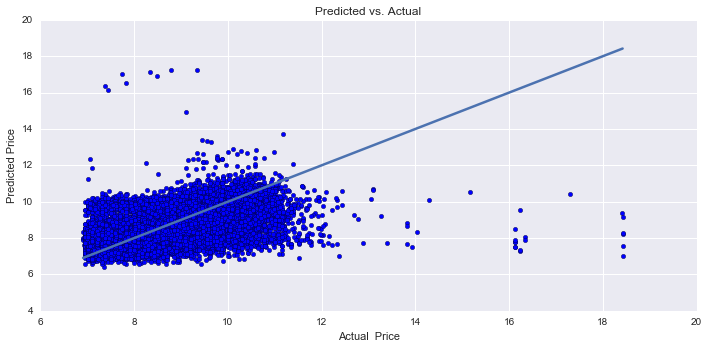

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual  Price')
plt.ylabel('Predicted Price')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)])
plt.tight_layout()

In [17]:
X1=XY1[['fuelType_Cat','RepairedDamage_Cat','YearsOld','KTY_ratio','powerPS_tr','year_tr','kilometer']].values
Y1=XY1[['price_tr']].values
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.33, random_state=42)

In [18]:
lr1= LinearRegression()
lr1.fit(X_train1,Y_train1)
Y_pred1= lr1.predict(X_test1)
print('mse:',mean_squared_error(Y_test1,Y_pred1))
print('r2_score:',r2_score(Y_test1, Y_pred1))

mse: 0.473188095458
r2_score: 0.425019581389


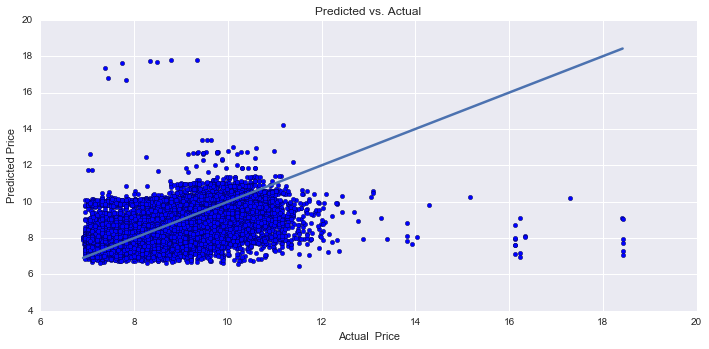

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(Y_test1, Y_pred1, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual  Price')
plt.ylabel('Predicted Price')
plt.plot([min(Y_test1), max(Y_test1)], [min(Y_test1), max(Y_test1)])
plt.tight_layout()

In [20]:
from sklearn.neural_network import MLPRegressor
hiddenlayerSize=(100, )
activation_fn='relu' # [‘identity’, ‘logistic’, ‘tanh’, ‘relu’]
solver_fn='adam' #  [‘lbfgs’, ‘sgd’, ‘adam’]
alpha_val= 0.0001
learning_rate='adaptive' #[‘constant’, ‘invscaling’, ‘adaptive’]
max_iter=200
warm_start=True
early_stopping=True
Val_score_tol=0.00001

In [27]:
reg = MLPRegressor(hidden_layer_sizes=hiddenlayerSize, 
                   activation=activation_fn, solver=solver_fn, 
                   alpha=0.0001, 
                   batch_size='auto', 
                   learning_rate=learning_rate, 
                   learning_rate_init=0.001, 
                   power_t=0.5, 
                   max_iter=max_iter, 
                   shuffle=True, 
                   random_state=32, 
                   tol=Val_score_tol, 
                   verbose=True, warm_start=warm_start, 
                   momentum=0.9, 
                   nesterovs_momentum=True, 
                   early_stopping=early_stopping, 
                   validation_fraction=0.1)

In [22]:
reg.fit(X_train,Y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5667.42876066
Validation score: -3.051875
Iteration 2, loss = 1.40371611
Validation score: -1.922050
Iteration 3, loss = 1.03449821
Validation score: -0.986855
Iteration 4, loss = 0.76110990
Validation score: -0.402069
Iteration 5, loss = 0.72842839
Validation score: -0.069707
Iteration 6, loss = 0.97807913
Validation score: -4.242408
Iteration 7, loss = 8.25010746
Validation score: -0.063449
Iteration 8, loss = 10.98182233
Validation score: 0.140204
Iteration 9, loss = 34.39866821
Validation score: 0.215664
Iteration 10, loss = 42.90142286
Validation score: -1.690274
Iteration 11, loss = 0.57425024
Validation score: 0.124608
Iteration 12, loss = 18.47252965
Validation score: -0.780834
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=32, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.1, verbose=True,
       warm_start=True)

In [23]:
Y_MLP_Pred = reg.predict(X_test)

In [24]:
print('mse:',mean_squared_error(Y_test,Y_MLP_Pred))

mse: 0.656596241892


In [25]:
X_Net=XY[['fuelType_Cat','RepairedDamage_Cat','YearsOld','KTY_ratio','powerPS_tr','year_tr','kilometer']].values
Y_Net=XY[['price_tr']].values
X_train_net, X_test_net, Y_train_net, Y_test_net = train_test_split(X_Net, Y_Net, test_size=0.33, random_state=42)

In [28]:
reg.fit(X_train_net,Y_train_net)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 743.13558889
Validation score: -1.668677
Iteration 2, loss = 0.92874914
Validation score: -0.853684
Iteration 3, loss = 0.56386123
Validation score: -1.481204
Iteration 4, loss = 0.56410794
Validation score: 0.133582
Iteration 5, loss = 5.82041215
Validation score: 0.227448
Iteration 6, loss = 9.99354437
Validation score: -34.489293
Iteration 7, loss = 29.13774282
Validation score: 0.337687
Iteration 8, loss = 7.31559853
Validation score: -0.169699
Iteration 9, loss = 10.20076692
Validation score: -0.287576
Iteration 10, loss = 25.80219220
Validation score: 0.004877
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=32, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.1, verbose=True,
       warm_start=True)

In [29]:
Y_MLP_Pred_net = reg.predict(X_test_net)
print('mse:',mean_squared_error(Y_test_net,Y_MLP_Pred_net))

mse: 0.546481129361


In [ ]:
kernel_fn='rbf'   # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
cost=10
degree=3 # used only for poly kernel
epsilon_val=0.01

In [ ]:
clf = SVR(kernel=kernel_fn,
           degree=3, 
           gamma='auto', 
           coef0=0.0, 
           tol=0.001, 
           C=cost, 
           epsilon=epsilon_val, shrinking=True, cache_size=200, verbose=True, max_iter=-1)


In [ ]:
clf.fit(X_train, Y_train) 